In [1]:
from pettingzoo.mpe import simple_tag_v2
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rand
import scipy.stats as stats
import math
import time

In [9]:
from utils import *

In [75]:
vels = []
env = simple_tag_v2.parallel_env(num_good=1, num_adversaries=3, num_obstacles=2, max_cycles=200)
env.seed(seed=42)
observations = env.reset()

actions = {agent: 0 for agent in env.agents}

for step in range(200):
    env.render()
    vels.append(len(observations['adversary_0']))
    observations, rewards, dones, infos = env.step(actions)        
    #actions['adversary_0'] = round(rand.rand() * 4)       
    
    if step == 0:
        actions['adversary_0'] = UP
    elif step == 20:
        actions['adversary_0'] = NO_ACTION
    elif step == 80:
        actions['agent_0'] = DOWN
    elif step == 100:
        actions['agent_0'] = NO_ACTION
    
print("done")
env.close()

done


In [76]:

vels = np.array(vels)
vels

array([16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16])

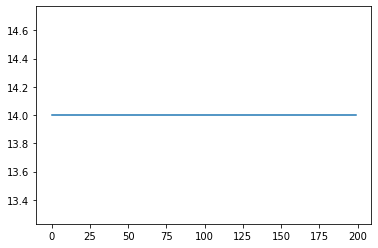

In [74]:
# data = np.array(vels)
# x, y = data.T
# plt.scatter(x,y)
# plt.show()
#plt.plot(vels[:,0])
plt.plot(vels)

In [190]:
actions = {agent: 0 for agent in env.agents}
actions['agent_0'] = 0
actions

{'adversary_0': 0, 'agent_0': 0}

In [149]:
observations, rewards, dones, infos = env.step(actions)

In [109]:
print("rewards", rewards)
print("dones", dones)
print("infos", infos)

rewards {'adversary_0': 0.0, 'agent_0': 0.0}
dones {'adversary_0': False, 'agent_0': False}
infos {'adversary_0': {}, 'agent_0': {}}


In [15]:
def make_bar_plot(values : np.array):
    # Compute pie slices
    N = len(values)
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
    width = np.pi * 2 / N
    colors = [plt.cm.viridis(0.6)]
    ax = plt.subplot(projection='polar')
    ax.bar(theta, values, width=width, bottom=0.0, color=colors, alpha=0.5)
    plt.show()

In [16]:
def add_danger(current_danger, new_danger, angle):
    N = len(current_danger)
    offset = (N - int(angle * N/(2*np.pi) - N/2)) % N
    print(offset)
    danger = current_danger - np.concatenate((new_danger[offset:],new_danger[:offset]))
    return danger

In [17]:
N = 41
ones = np.ones(N) * 20

In [15]:
env.render()

In [16]:
env.close()

In [13]:
env.observations['agent_0']

AttributeError: 'to_parallel_wrapper' object has no attribute 'observations'

In [14]:
env.reset()['adversary_0']

array([ 0.        ,  0.        , -0.6893075 , -0.54866135,  1.5235052 ,
       -0.03165101, -0.09578706,  0.9015505 ,  0.06173463,  1.2170922 ,
       -0.23233758,  0.5471605 ,  0.        ,  0.        ], dtype=float32)

In [31]:
env.seed(42)
env.reset()
actions['adversary_0'] = DOWN
for i in range(5):    
    observations, rewards, dones, infos = env.step(actions)    
    print(observations['adversary_0'])
    env.render()
    time.sleep(1)
env.close()


[ 0.         -0.3        -0.25171325 -0.0613229  -0.39462188 -0.15589748
 -0.29848602  0.4327506   1.0932549   0.02521385  0.36390156  0.42977583
  0.          0.        ]
[ 0.         -0.525      -0.25171325 -0.1138229  -0.39462188 -0.10339749
 -0.29848602  0.48525062  1.0932549   0.07771385  0.36390156  0.48227584
  0.          0.        ]
[ 0.         -0.69375    -0.25171325 -0.1831979  -0.39462188 -0.03402249
 -0.29848602  0.55462563  1.0932549   0.14708886  0.36390156  0.5516508
  0.          0.        ]
[ 0.         -0.8203125  -0.25171325 -0.26522914 -0.39462188  0.04800876
 -0.29848602  0.6366569   1.0932549   0.2291201   0.36390156  0.6336821
  0.          0.        ]
[ 0.         -0.9152344  -0.25171325 -0.35675257 -0.39462188  0.1395322
 -0.29848602  0.7281803   1.0932549   0.32064354  0.36390156  0.72520554
  0.         -0.        ]


In [19]:
import time

(4,)